In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import models,layers  #tensorflow.keras
from keras.layers import MaxPooling2D
import matplotlib.pyplot as plt

In [ ]:

IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
epochs=50

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

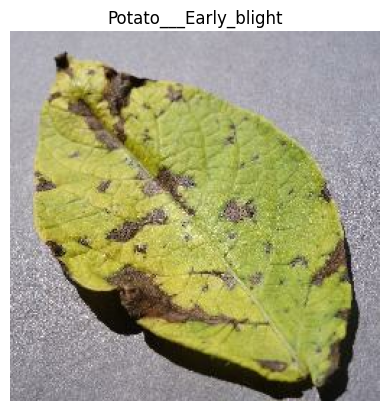

In [ ]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    # print(label_batch)
    plt.title(class_names[label_batch[0]])
    plt.axis('off')

In [ ]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
train_ds=dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds=dataset.skip(54)
len(dataset)

68

In [ ]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [ ]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
from keras.layers import MaxPooling2D


In [ ]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
EPOCHS=10

In [ ]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/10
54/54 [==============================] - 254s 510ms/step - loss: 0.7505 - accuracy: 0.6950 - val_loss: 0.5175 - val_accuracy: 0.8229
Epoch 2/10
54/54 [==============================] - 3s 59ms/step - loss: 0.4256 - accuracy: 0.8530 - val_loss: 0.5147 - val_accuracy: 0.8125
Epoch 3/10
54/54 [==============================] - 3s 58ms/step - loss: 0.3349 - accuracy: 0.8744 - val_loss: 0.3067 - val_accuracy: 0.9062
Epoch 4/10
54/54 [==============================] - 3s 61ms/step - loss: 0.2691 - accuracy: 0.8935 - val_loss: 0.4445 - val_accuracy: 0.7865
Epoch 5/10
54/54 [==============================] - 3s 59ms/step - loss: 0.2277 - accuracy: 0.9126 - val_loss: 0.1079 - val_accuracy: 0.9583
Epoch 6/10
54/54 [==============================] - 3s 59ms/step - loss: 0.1487 - accuracy: 0.9531 - val_loss: 0.2537 - val_accuracy: 0.8906
Epoch 7/10
54/54 [==============================] - 3s 58ms/step - loss: 0.1358 - accuracy: 0.9479 - val_loss: 0.1604 - val_accuracy: 0.9375
Epoch 8/10

In [ ]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 5s 23ms/step - loss: 0.0903 - accuracy: 0.9569


In [ ]:
scores

[0.09026997536420822, 0.9568965435028076]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

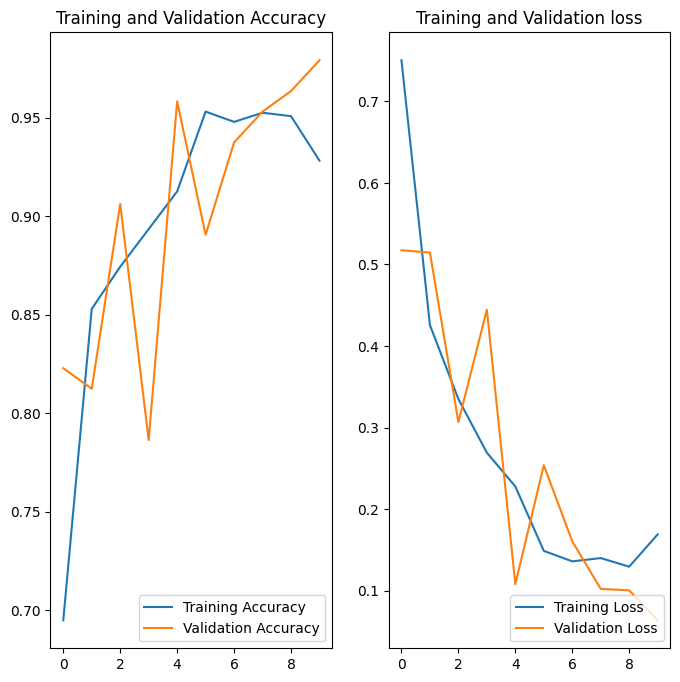

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')
plt.show()

[[[200. 195. 192.]
  [199. 194. 191.]
  [197. 192. 189.]
  ...
  [197. 193. 194.]
  [198. 194. 195.]
  [200. 196. 197.]]

 [[200. 195. 192.]
  [198. 193. 190.]
  [195. 190. 187.]
  ...
  [196. 192. 193.]
  [194. 190. 191.]
  [194. 190. 191.]]

 [[199. 194. 191.]
  [196. 191. 188.]
  [193. 188. 185.]
  ...
  [197. 193. 194.]
  [195. 191. 192.]
  [192. 188. 189.]]

 ...

 [[138. 129. 132.]
  [134. 125. 128.]
  [129. 120. 123.]
  ...
  [150. 144. 148.]
  [154. 148. 152.]
  [154. 148. 152.]]

 [[133. 124. 127.]
  [135. 126. 129.]
  [130. 121. 124.]
  ...
  [154. 148. 152.]
  [161. 155. 159.]
  [162. 156. 160.]]

 [[126. 117. 120.]
  [135. 126. 129.]
  [135. 126. 129.]
  ...
  [152. 146. 150.]
  [157. 151. 155.]
  [155. 149. 153.]]]
0
actual label: 0
actual label: Potato___Early_blight
1/1 [==============================] - 0s 124ms/step
predict label: Potato___Early_blight
batch pred: [9.902940e-01 9.705959e-03 6.790769e-08]
max: 0


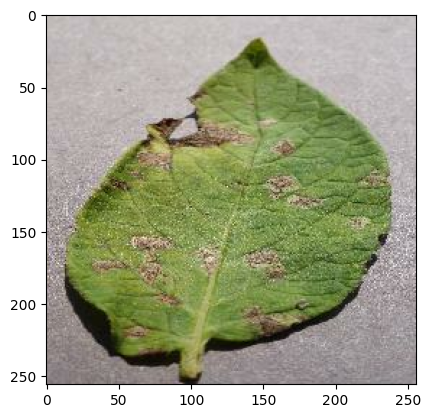

In [ ]:
import numpy as np

for images_batch,labels_batch in test_ds.take(1):
  print(images_batch[0].numpy())
  print(labels_batch[0].numpy())

  plt.imshow(images_batch[0].numpy().astype('uint8'))
  print('actual label:',labels_batch[0].numpy())
  print('actual label:',class_names[labels_batch[0].numpy()])

  batch_prediction=model.predict(images_batch)
  print('predict label:',class_names[np.argmax(batch_prediction[0])])
  print('batch pred:',batch_prediction[0]) #higest probability gives the class
  print('max:',np.argmax(batch_prediction[0]))
  